In [6]:
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.stats import kurtosis, skew
import os
from rcv_distribution import *

c:\Users\mahsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [7]:
def analyze_peaks(data):
    # Find peaks
    peaks, _ = find_peaks(data)
    peak_heights = data[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(peak1 - peak2)
    
    return {
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis
    }

In [8]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [9]:
def analyze_kde_peaks(data, bandwidth=0.1):
    
    data = normalize_data(data)
    
    # Calculate KDE
    kde = gaussian_kde(data, bw_method=bandwidth)
    x = np.linspace(np.min(data), np.max(data), 1000)
    kde_values = kde(x)

    # Find peaks in the KDE
    peaks, _ = find_peaks(kde_values)
    peak_heights = kde_values[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(x[peak1] - x[peak2])

    bimodality = (significance1 * significance2) / (closeness * (abs(significance1 - significance2)))
    
    return {
        "peak1": peak1,
        "peak2": peak2,
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis,
        "Bimodality" : bimodality
    }


Significance of peak 1: 0.9887866689297592
Significance of peak 2: 0.9887866689297592
Closeness of peaks: 0.0
Distance on x axis: 140057


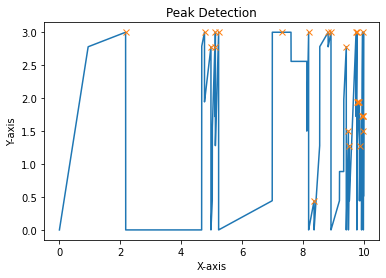

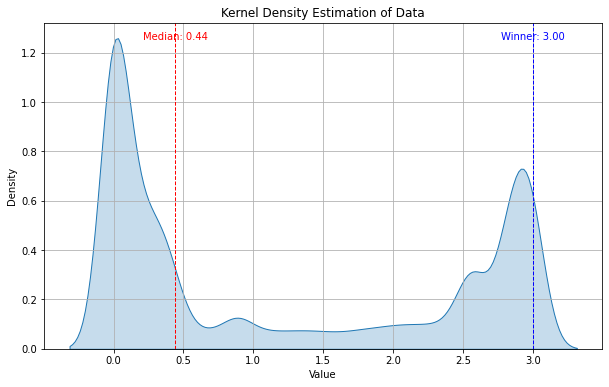

In [3]:
# Example usage 
filename = "Alaska_11082022_GovernorLieutenantGovernor"
data = np.load("np_data/" + filename + ".npy")

result = analyze_peaks(data)
print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])

# Plotting
x = np.linspace(0, 10, len(data))
peaks, _ = find_peaks(data)
plt.plot(x, data)
plt.plot(x[peaks], data[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Peak Detection')
plt.show()

plot_median_and_winner(filename)

peak1:  692   peak2:  562
Significance of peak 1: 2.1802787232802774
Significance of peak 2: 2.133827370513045
Closeness of peaks: 0.024049785107006727
Distance on x axis: 0.1301301301301302
Bimodality 4164.489120575616


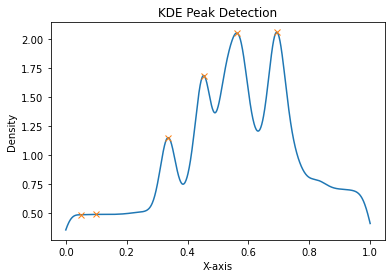

In [7]:
filename = "Minneapolis_11072017_Mayor"
data = np.load("np_data/" + filename + ".npy")

result = analyze_kde_peaks(data)
print("peak1: ", result["peak1"], " ", "peak2: ", result["peak2"])
print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])
print("Bimodality", result["Bimodality"])

# Plotting
data = normalize_data(data)
kde = gaussian_kde(data)
x = np.linspace(np.min(data), np.max(data), 1000)
kde_values = kde(x)
peaks, _ = find_peaks(kde_values)

plt.plot(x, kde_values)
plt.plot(x[peaks], kde_values[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('KDE Peak Detection')
plt.show()





In [48]:
import pickle
def load_data(filename, save_folder):
    # Extract the base filename without extension
    base_filename = os.path.splitext(os.path.basename(filename))[0]

    # Create the save paths for dictionary and list
    dict_load_path = os.path.join(save_folder, f"{base_filename}_ballots.pkl")
    list_load_path = os.path.join(save_folder, f"{base_filename}_candidates.pkl")

    # Load the dictionary
    with open(dict_load_path, 'rb') as dict_file:
        data_dict = pickle.load(dict_file)

    # Load the list
    with open(list_load_path, 'rb') as list_file:
        data_list = pickle.load(list_file)

    return data_dict, data_list


In [11]:
def analyze_kde_peaks_normalized_heights(data, bandwidth=0.1):
    # Normalize the data
    data = normalize_data(data)

    # Calculate KDE
    kde = gaussian_kde(data, bw_method=bandwidth)
    x = np.linspace(np.min(data), np.max(data), 1000)
    kde_values = kde(x)

    # Normalize KDE values
    kde_values = normalize_data(kde_values)

    # Find peaks in the KDE
    peaks, _ = find_peaks(kde_values)
    peak_heights = kde_values[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
 
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    # Calculate significance (difference from the mean of other peaks)
    other_heights = np.delete(peak_heights, top_peaks)
    mean_other_heights = np.mean(other_heights)
    std_other_heights = np.std(other_heights)
    
    significance1 = (height1 - mean_other_heights) / std_other_heights
    significance2 = (height2 - mean_other_heights) / std_other_heights
    
    # Calculate closeness (absolute difference in heights)
    closeness = abs(height1 - height2)
    
    # Calculate distance on the x-axis
    distance_on_x_axis = abs(x[peak1] - x[peak2])


    x_between_peaks = x[min(peak1, peak2):max(peak1, peak2)+1]
    kde_values_between_peaks = kde_values[min(peak1, peak2):max(peak1, peak2)+1]
    area_between_peaks = simps(kde_values_between_peaks, x_between_peaks)
    
    bimodality = (significance1 * significance2) / ((1 + closeness) * (1 + (abs(significance1 - significance2))))
    
    return {
        "peak1": x[peak1],
        "peak2": x[peak2],
        "significance_of_peak1": significance1,
        "significance_of_peak2": significance2,
        "closeness_of_peaks": closeness,
        "distance_on_x_axis": distance_on_x_axis,
        "Bimodality" : bimodality
    }

In [72]:
def significance(data):

    data = normalize_data(data)

    # Calculate KDE
    kde = gaussian_kde(data, bw_method=0.1)
    x = np.linspace(np.min(data), np.max(data), 1000)
    kde_values = kde(x)

    # Normalize KDE values
    kde_values = normalize_data(kde_values)

    # Find peaks in the KDE
    peaks, _ = find_peaks(kde_values)
    peak_heights = kde_values[peaks]

    # Check if there are at least two peaks
    if len(peak_heights) < 2:
        raise ValueError("Not enough peaks to determine bimodality")

    # Sort peaks by height
    sorted_indices = np.argsort(peak_heights)[::-1]  # Descending order
 
    top_peaks = sorted_indices[:2]  # Get the indices of the two highest peaks

    peak1, peak2 = peaks[top_peaks[0]], peaks[top_peaks[1]]
    height1, height2 = peak_heights[top_peaks[0]], peak_heights[top_peaks[1]]
    
    std_kde = np.std(kde_values)
    print(std_kde)
    significance1 = (height1) / std_kde
    significance2 = (height2) / std_kde
    print("peak 1: ", x[peak1], "height: ", height1, "significance: ", significance1)
    print("peak 1: ", x[peak2], "height: ", height2," significance: ", significance2)

    
    plt.plot(x, kde_values)
    plt.plot(x[peaks], kde_values[peaks], "x")
    plt.xlabel('X-axis')
    plt.ylabel('Density')
    plt.title('KDE')
    plt.show()

    


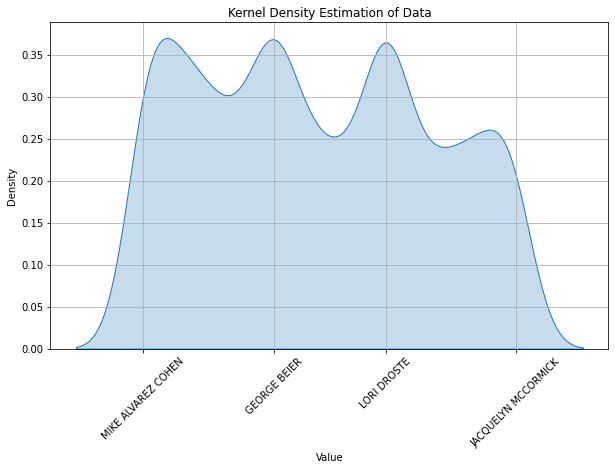

0.07536732091668263
peak 1:  1.954954954954955 height:  0.4976971874864644 significance:  6.603620527213123
peak 1:  1.054054054054054 height:  0.465702214566816  significance:  6.179100025084377


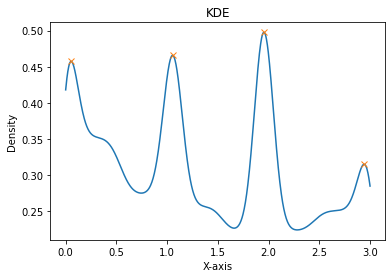

In [71]:
filename = ""
ballots, candidates = load_data(filename, "saved_ballots_and_candidates")
candidate_positions_file = pd.read_csv("null_elections/" + filename + ".csv")
normalized_positions = pd.Series(candidate_positions_file['position'].values, index=candidate_positions_file['candidate']).to_dict()
plot_KDE(ballots, normalized_positions)
data = np.load("np_data_new/" + filename + ".npy")
significance(data)


In [22]:
filename = "Minnetonka_11022021_CityCouncilAtLargeSeatB"
data = np.load("np_data/" + filename + ".npy")

result = analyze_kde_peaks_normalized_heights(data)
print("peak1: ", result["peak1"], " peak2: ", result["peak2"])
print("significance of peak1: ", significance(data, result["peak1"]))
print("significance of peak2: ", significance(data, result["peak2"]))

print("Significance of peak 1:", result["significance_of_peak1"])
print("Significance of peak 2:", result["significance_of_peak2"])
print("Closeness of peaks:", result["closeness_of_peaks"])
print("Distance on x axis:", result["distance_on_x_axis"])
print("Bimodality", result["Bimodality"])


# Plotting
data = normalize_data(data)
kde = gaussian_kde(data)
x = np.linspace(np.min(data), np.max(data), 1000)
kde_values = kde(x)
kde_values = normalize_data(kde_values)
peaks, _ = find_peaks(kde_values)

plt.plot(x, kde_values)
plt.plot(x[peaks], kde_values[peaks], "x")
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.title('KDE')
plt.show()

s = skew(data)
k = kurtosis(data, fisher=False)
print("Skewness: ", s)
print("Kurtosis: ", k)
print("Bimodality II: ", ((s ** 2) + 1)/k)

n = len(data)
bimodality3 = (s**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))

print("Bimodality III: ", bimodality3)


peak1:  0.3153153153153153  peak2:  0.7857857857857857


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Polarization Analysis

In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

table = pd.read_csv("median_voter_analysis2.csv")
directory = "np_data_new"

for filename in os.listdir(directory):
    try:
        data = np.load("np_data_new/" + filename)
        result = analyze_kde_peaks_normalized_heights(data)
        polarization = result["distance_on_x_axis"]
        filename = filename[0:-4] + ".csv"
        print(filename)
        table.loc[table["filename"]==filename, "polarization"] = polarization
        
    except Exception as e:
        filename = filename[0:-4] + ".csv"
        print(filename, " " , e)
        table.loc[table["filename"]==filename, "polarization"] = "NA"
    print(table.loc[table["filename"]==filename, "polarization"].tolist())



Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv
[0.24324324324324326]
Alaska_08162022_HouseofRepresentativesSpecial.csv
[0.977977977977978]
Alaska_11082022_GovernorLieutenantGovernor.csv
[0.9529529529529529]
Alaska_11082022_HouseDistrict1.csv
[0.9969969969969971]
Alaska_11082022_HouseDistrict10.csv
[0.990990990990991]
Alaska_11082022_HouseDistrict11.csv
[0.6236236236236237]
Alaska_11082022_HouseDistrict12.csv
[0.9969969969969971]
Alaska_11082022_HouseDistrict13.csv
[0.9969969969969971]
Alaska_11082022_HouseDistrict14.csv
[0.997997997997998]
Alaska_11082022_HouseDistrict15.csv
[0.981981981981982]
Alaska_11082022_HouseDistrict16.csv
[0.997997997997998]
Alaska_11082022_HouseDistrict17.csv
[0.9929929929929929]
Alaska_11082022_HouseDistrict18.csv
[0.6306306306306306]
Alaska_11082022_HouseDistrict19.csv
[0.9939939939939939]
Alaska_11082022_HouseDistrict2.csv
[0.997997997997998]
Alaska_11082022_HouseDistrict20.csv
[0.975975975975976]
Alaska_11082022_HouseDistrict21.csv
[0.997997997997998]
Alas

In [16]:
table.to_csv("median_voter_analysis.csv")

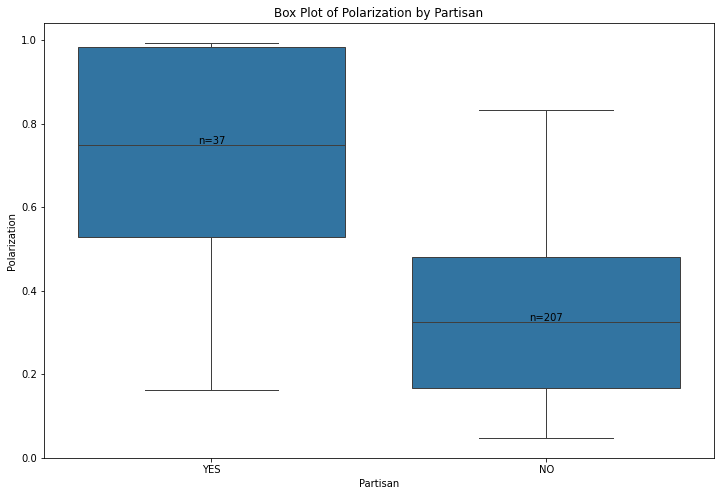

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['gamma', 'partisan', 'polarization'])
df = df[df['gamma'] < 1]

# Filter data for partisan == YES and NO
df_yes = df[df['partisan'] == 'YES']
df_no = df[df['partisan'] == 'NO']

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plotting with seaborn without outliers
sns.boxplot(x='partisan', y='polarization', data=pd.concat([df_yes, df_no]), showfliers=False)

# Annotate with number of values at each point
# Calculate counts
counts_yes = df_yes.groupby('partisan').size().values[0]
counts_no = df_no.groupby('partisan').size().values[0]

# Annotate the plot with counts
plt.text(0, df_yes['polarization'].median(), f'n={counts_yes}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')
plt.text(1, df_no['polarization'].median(), f'n={counts_no}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

# Customize plot
plt.title('Box Plot of Polarization by Partisan')
plt.xlabel('Partisan')
plt.ylabel('Polarization')

# Show plot
plt.show()


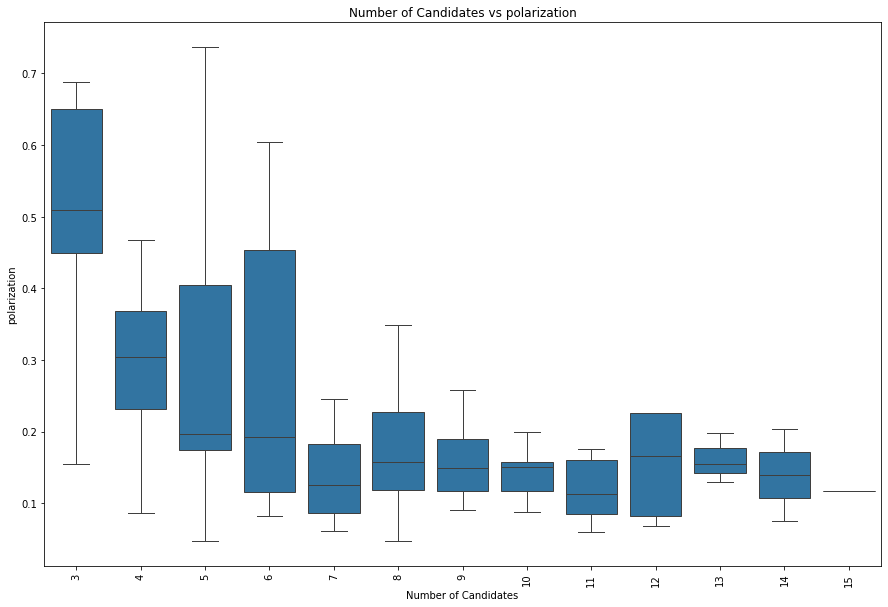

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the CSV file
csv_file_path = 'median_voter_analysis.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['#candidates', 'polarization'])

# Filter data for number of candidates > 2 and <= 15
df_filtered = df[(df['#candidates'] > 2) & (df['#candidates'] <= 15) & (df['gamma'] < 1)]

# Create a box plot
plt.figure(figsize=(15, 10))

# Plotting with seaborn to control the presence of outliers
sns.boxplot(x='#candidates', y='polarization', data=df_filtered, showfliers=False)



# Customize plot
plt.title('Number of Candidates vs polarization')
plt.xlabel('Number of Candidates')
plt.ylabel('polarization')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show plot
plt.show()


In [45]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

table = pd.read_csv("median_voter_analysis.csv")
directory = "np_data_new"
peaks = np.array([])

for filename in os.listdir(directory):
    try:
        if (table.loc[table["filename"] == (filename[0:-4] + ".csv"), "gamma"].tolist()[0] < 1):
            data = np.load("np_data_new/" + filename)
            result = analyze_kde_peaks_normalized_heights(data)
            peak1 = result["peak1"]
            peak2 = result["peak2"]
            peaks = np.append(peaks, peak1)
            peaks = np.append(peaks, peak2)

    except Exception as e:
        print(filename, " ", e)


Albany_11082022_FAKECityCouncil.npy   list index out of range


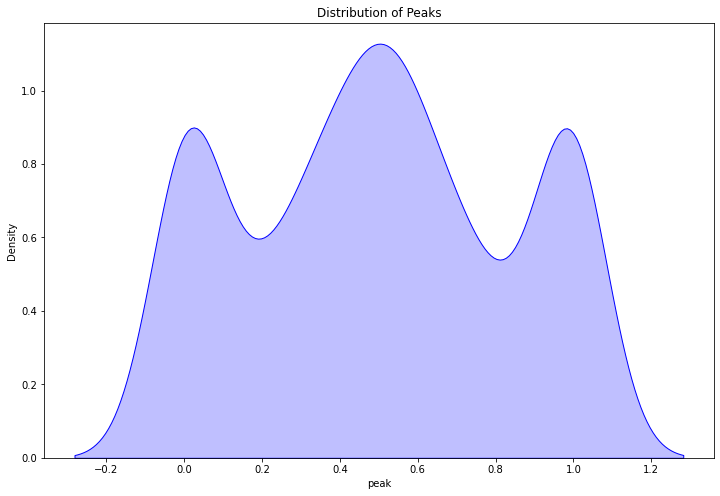

In [46]:
plt.figure(figsize=(12,8))
sns.kdeplot(peaks, shade=True, color='blue')

plt.title("Distribution of Peaks")
plt.xlabel("peak")
plt.ylabel("Density")

plt.show()

In [47]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

table = pd.read_csv("median_voter_analysis2.csv")
directory = "np_data_new"
peaks_partisan = np.array([])
peaks_non_partisan = np.array([])

for filename in os.listdir(directory):
    try:
        
        if (table.loc[table["filename"] == (filename[0:-4] + ".csv"), "gamma"].tolist()[0] < 1):
            data = np.load("np_data_new/" + filename)
            result = analyze_kde_peaks_normalized_heights(data)
            peak1 = result["peak1"]
            peak2 = result["peak2"]
            if (table.loc[table["filename"]==(filename[0:-4]+".csv"), "partisan"].tolist()[0] == "YES"):
                #print(filename, " partisan")
                peaks_partisan = np.append(peaks, peak1)
                peaks_partisan = np.append(peaks, peak2)

            elif (table.loc[table["filename"]==(filename[0:-4]+".csv"), "partisan"].tolist()[0] == "NO"):
                #print(filename, " partisan")
                peaks_non_partisan = np.append(peaks, peak1)
                peaks_non_partisan = np.append(peaks, peak2)

    except Exception as e:
        print(filename, " ", e)



Albany_11082022_FAKECityCouncil.npy   list index out of range


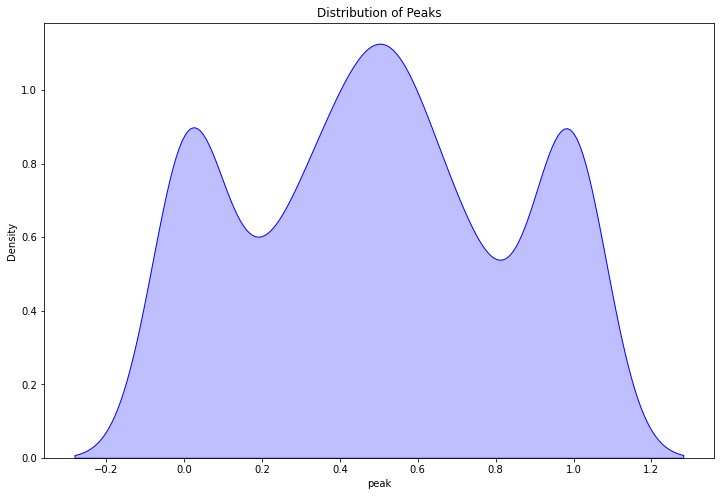

In [48]:
plt.figure(figsize=(12,8))
sns.kdeplot(peaks_partisan, shade=True, color='blue')
#plt.hist(peaks_partisan)

plt.title("Distribution of Peaks")
plt.xlabel("peak")
plt.ylabel("Density")

plt.show()

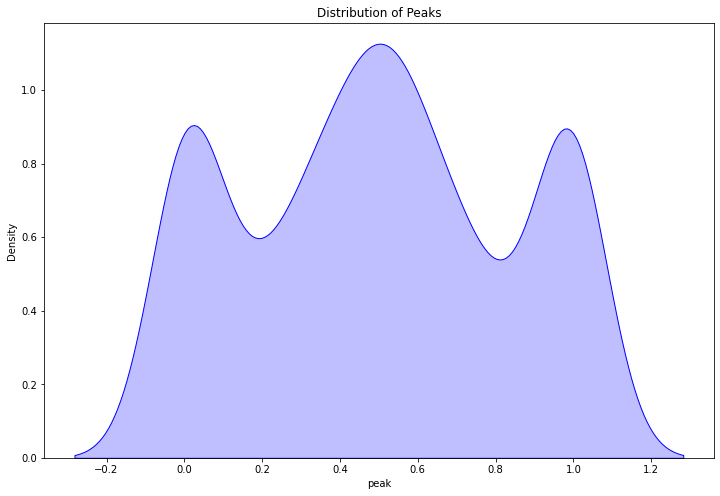

In [49]:
plt.figure(figsize=(12,8))
sns.kdeplot(peaks_non_partisan, shade=True, color='blue')
#plt.hist(peaks_non_partisan)

plt.title("Distribution of Peaks")
plt.xlabel("peak")
plt.ylabel("Density")

plt.show()

[0.83655754 0.3026934 ]
[0.02267253 0.04876576]


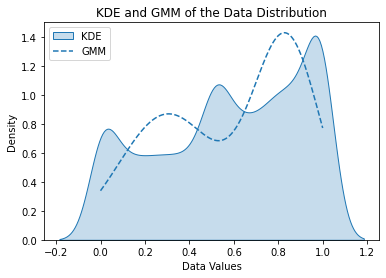

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde

filename = "Maine_07142020_DemocraticCandidateforMaineStateSenateDistrict11"
data = np.load("np_data_new/" + filename + ".npy")  # Replace with your actual data
data = normalize_data(data)
# Step 1: Fit a Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=0)  # Adjust n_components as needed
gmm.fit(data.reshape(-1, 1))

# Get the means and covariances of the GMM components
means = gmm.means_.flatten()
covariances = gmm.covariances_.flatten()
print(means)
print(covariances)

# Step 2: Plot the KDE of your data
sns.kdeplot(data, fill=True, label='KDE')

# Step 3: Overlay the GMM components on the KDE plot
x = np.linspace(min(data), max(data), 1000)
gmm_pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))

plt.plot(x, gmm_pdf, label='GMM', linestyle='--')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.title('KDE and GMM of the Data Distribution')
plt.show()

